## Backend 

V temu delu bom izvajal osnovne operacije nad podatki.

### Podatki

Opis podatkovne zbirke MovieLens ostaja enak prvi nalogi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [51]:
#reading the CSV file

#read the data and split by ","
data = pd.read_csv('podatki/student_data.csv', sep=",", encoding="windows-1250")

#cut data sex, age, address, Pstatus, Medu, Fedu, reason, guardian, traveltime, studytime, schoolsup, famsup, paid, activities, nursery, internet, famrel, freetime, goout, Dalc, Walc, health, absences
#cut = ['sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

#for a in cut:
#    data = data.drop(a, 1)

%store data

Stored 'data' (DataFrame)


In [3]:
#show the head of the data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
#show the tail of the data
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
print(data.shape)

(395, 33)


In [6]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Text(0.5, 1.0, 'Število študentov glede na vrsto šole')

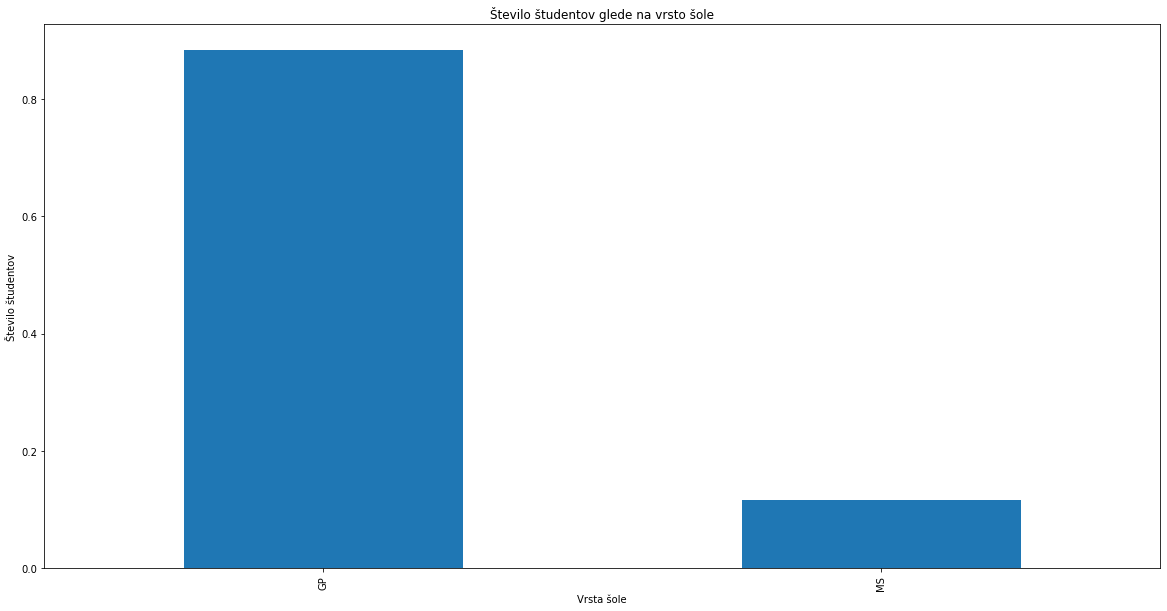

In [7]:
#get school type and plot number of recordings based on school type

plt.figure(figsize=(20,10))
plt.ascending = True
data.school.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Število študentov')
plt.xlabel('Vrsta šole')
plt.title('Število študentov glede na vrsto šole')

Text(0.5, 1.0, 'Povprečna ocena glede na vrsto šole')

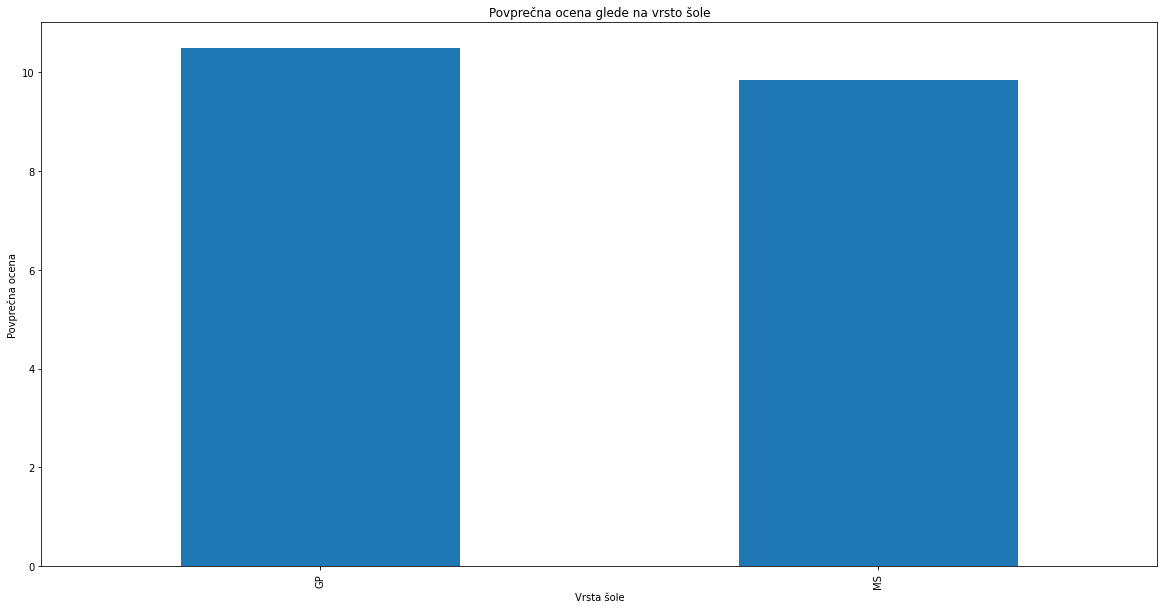

In [8]:
#get average grade for each school type

plt.figure(figsize=(20,10))
data.groupby('school')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Vrsta šole')
plt.title('Povprečna ocena glede na vrsto šole')



Stored 'job' (Series)


Text(0.5, 1.0, 'Povprečna ocena glede na poklic staršev')

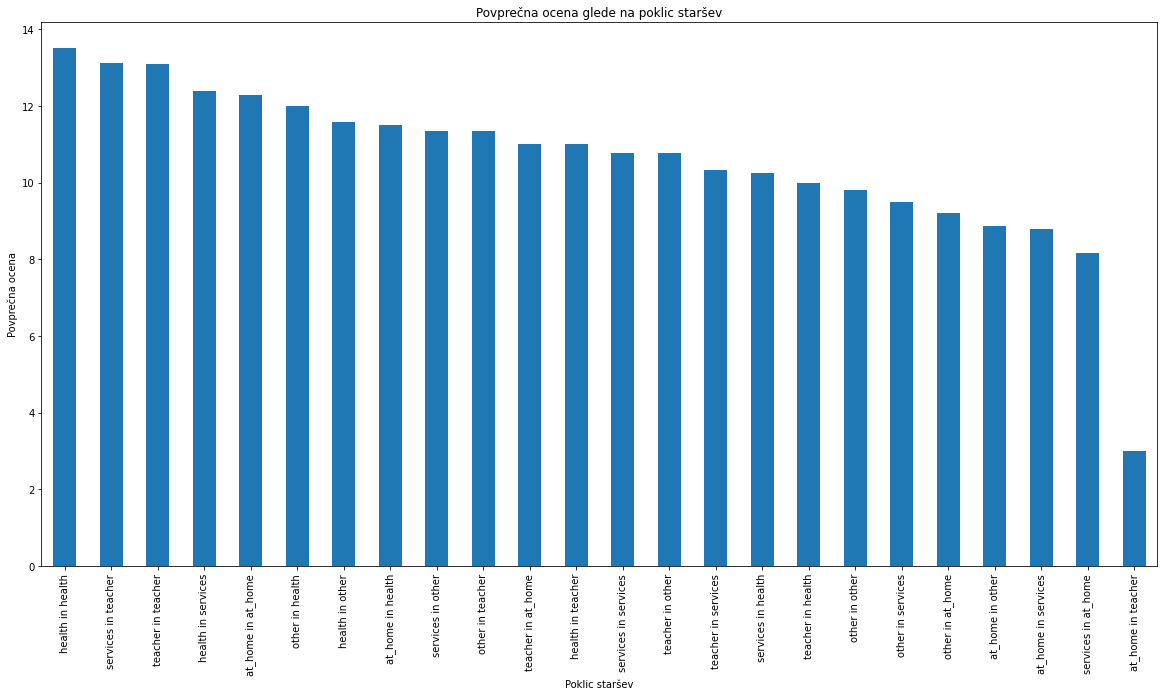

In [40]:
#combine the mothers and fathers job

data['M+FJob'] = data['Mjob'] + ' in ' + data['Fjob']

#use the data['M+FJob'] to get the average grade for each job combination and plot it ordered by the average grade

job = data.groupby('M+FJob')['G3'].mean().sort_values(ascending=False)
%store job

plt.figure(figsize=(20,10))
data.groupby('M+FJob')['G3'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Poklic staršev')
plt.title('Povprečna ocena glede na poklic staršev')





Text(0.5, 1.0, 'Distribucija zaposlitev staršev')

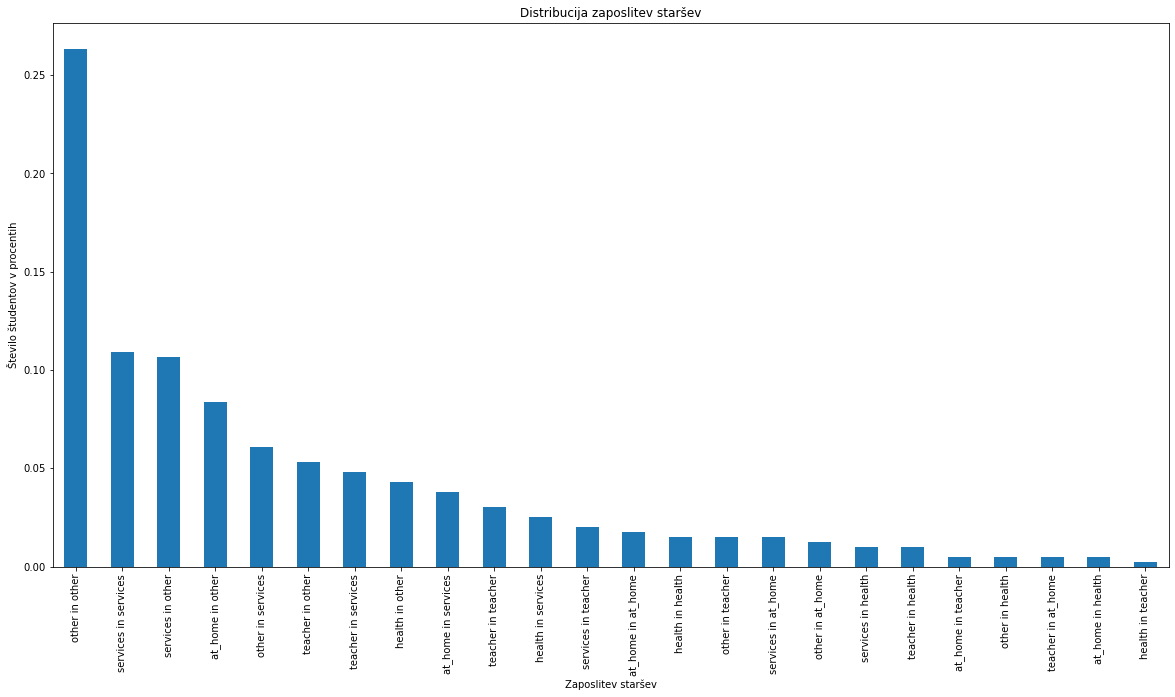

In [10]:
#distriubtion of mother and father jobs using percentage

plt.figure(figsize=(20,10))
plt.ascending = True
data['M+FJob'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Število študentov v procentih')
plt.xlabel('Zaposlitev staršev')
plt.title('Distribucija zaposlitev staršev')



Stored 'failiures' (Series)


Text(0.5, 1.0, 'Povprečna ocena glede na število neuspešnih let')

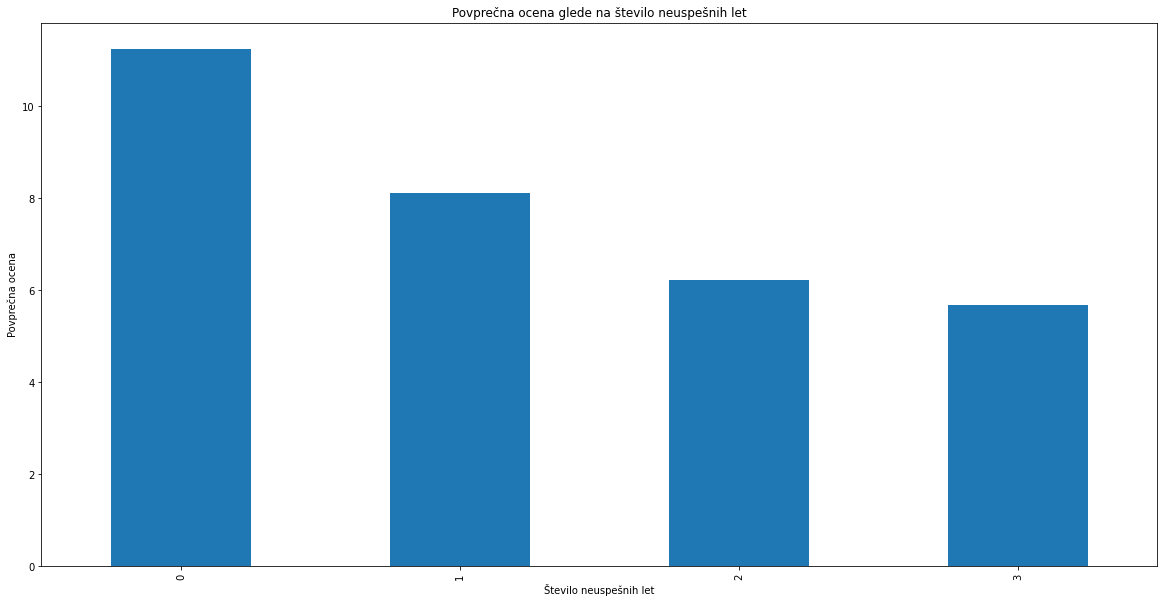

In [49]:
#show the number of past failiures and the 
#average grade for each number of past failures

plt.figure(figsize=(20,10))
plt.ascending = True
failiures = data.groupby('failures')['G3'].mean()
%store failiures
data.groupby('failures')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Število neuspešnih let')
plt.title('Povprečna ocena glede na število neuspešnih let')


Stored 'ct' (DataFrame)


Text(0.5, 1.0, 'Število neuspešnih let glede na romantično zvezo')

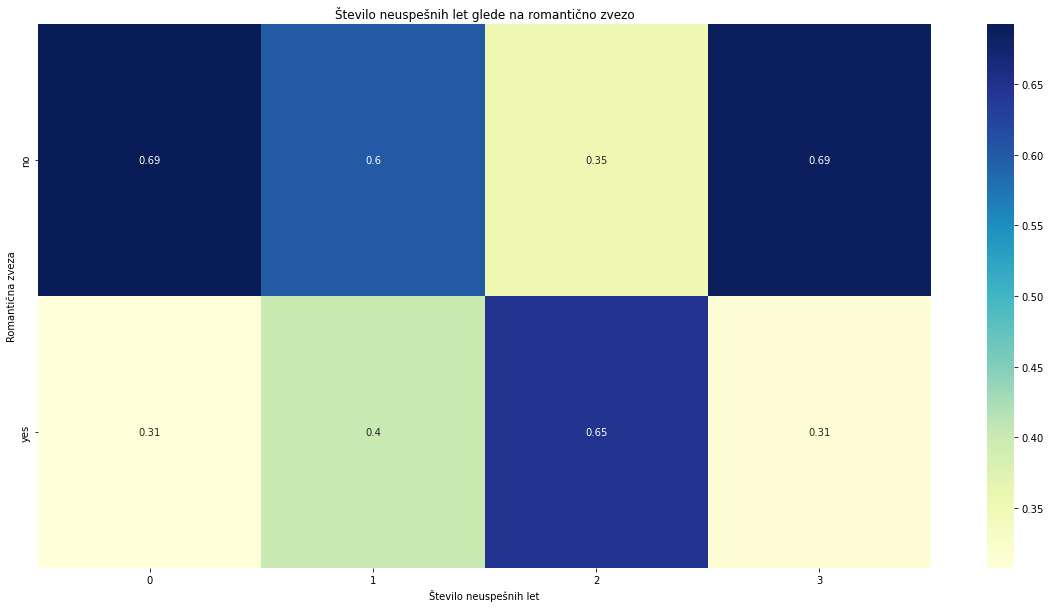

In [53]:
#Show the number of failiures by if the student is in a romantic relationship where relationship in different colors using heatmap

plt.figure(figsize=(20,10))
plt.ascending = True
ct = pd.crosstab(data['romantic'], data['failures'], normalize='columns')
%store ct
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.ylabel('Romantična zveza')
plt.xlabel('Število neuspešnih let')
plt.title('Število neuspešnih let glede na romantično zvezo')




Text(0.5, 1.0, 'Želja za višjo izobrazbo glede na število članov družine')

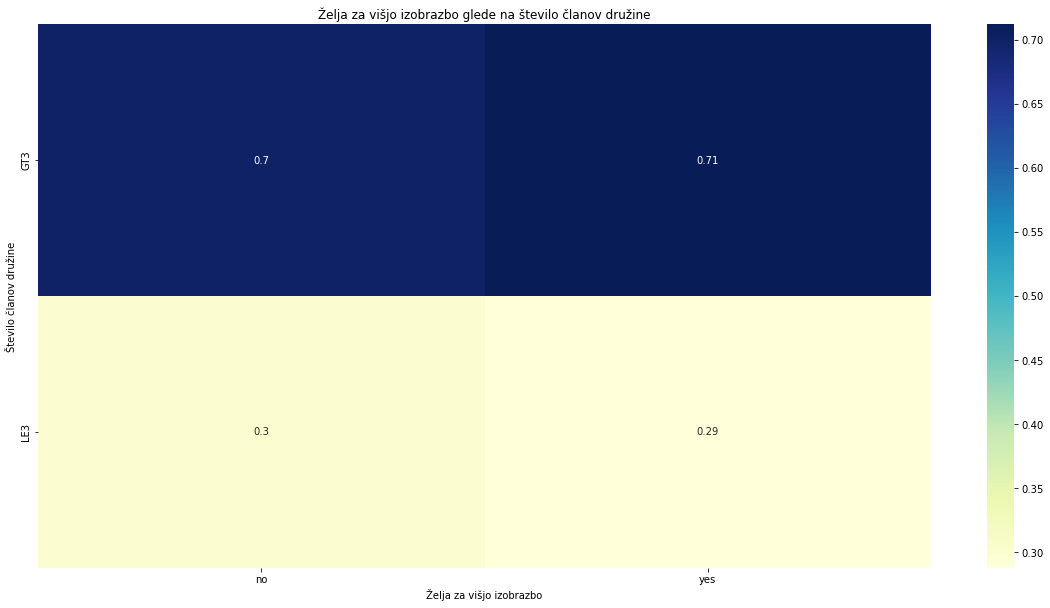

In [13]:
#Distribution of students that want higher education by family size

plt.figure(figsize=(20,10))
plt.ascending = True
ct = pd.crosstab(data['famsize'], data['higher'], normalize='columns')
sns.heatmap(ct, annot=True, cmap="YlGnBu")
plt.ylabel('Število članov družine')
plt.xlabel('Želja za višjo izobrazbo')
plt.title('Želja za višjo izobrazbo glede na število članov družine')


Text(0.5, 1.0, 'Povprečna ocena glede na spol')

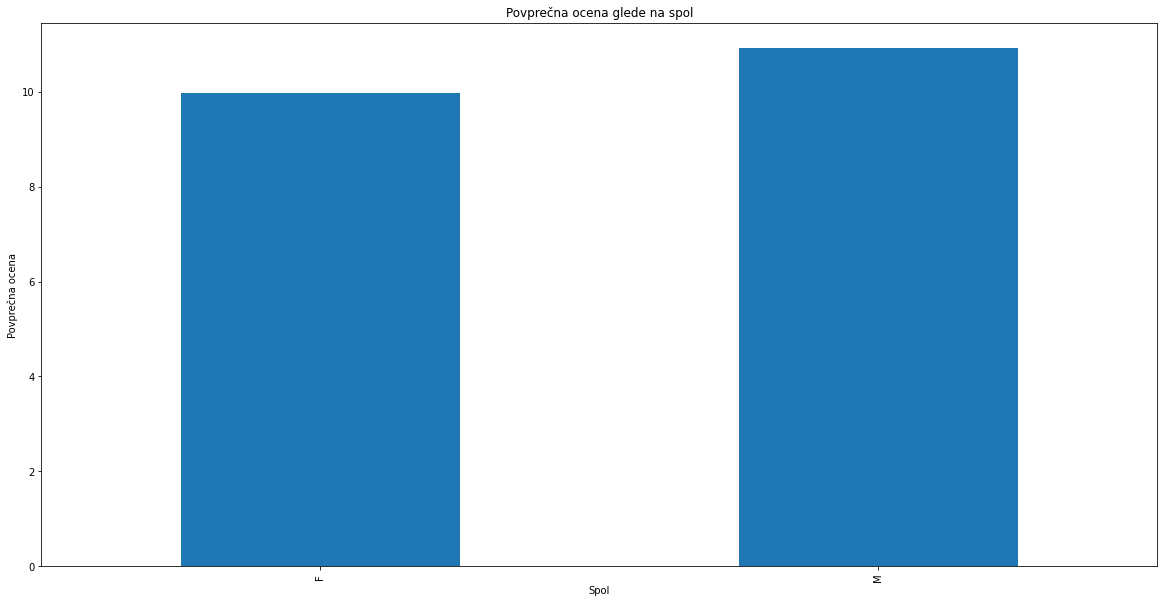

In [54]:
# Distribution of students by sex and final grade

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('sex')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Spol')
plt.title('Povprečna ocena glede na spol')


Stored 'higher' (Series)


Text(0.5, 1.0, 'Povprečna ocena glede na željo po višji izobrazbi')

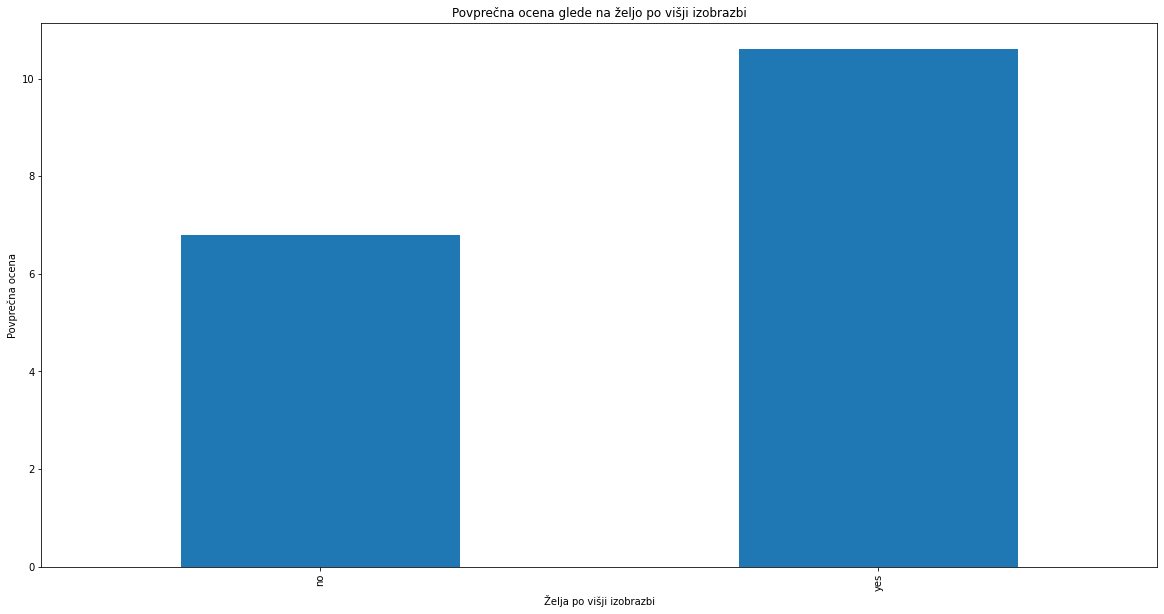

In [55]:
#Distribution between average grade and if they want higher education

higher = data.groupby('higher')['G3'].mean()
%store higher

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('higher')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Želja po višji izobrazbi')
plt.title('Povprečna ocena glede na željo po višji izobrazbi')


Stored 'alcohol' (Series)


Text(0.5, 1.0, 'Povprečna ocena glede na količino popitega alkohola med tednom')

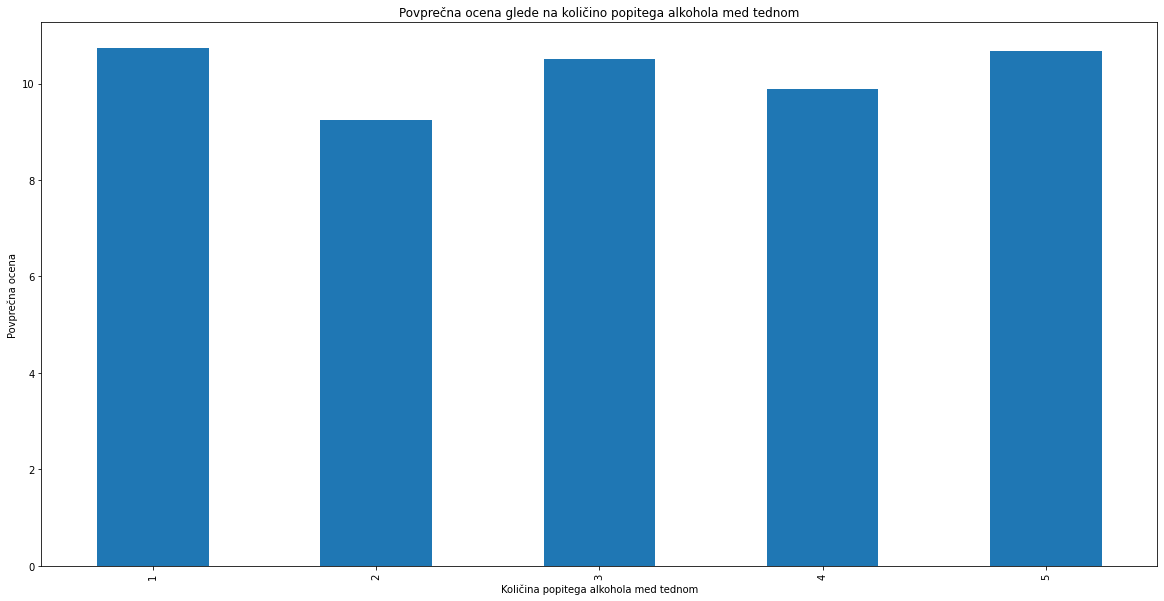

In [56]:
# Analyze the data for the impact of alcohol on the average grade and normalize

alcohol = data.groupby('Dalc')['G3'].mean()
%store alcohol

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('Dalc')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Količina popitega alkohola med tednom')
plt.title('Povprečna ocena glede na količino popitega alkohola med tednom')


Text(0.5, 1.0, 'Povprečna ocena glede na dodatne aktivnosti')

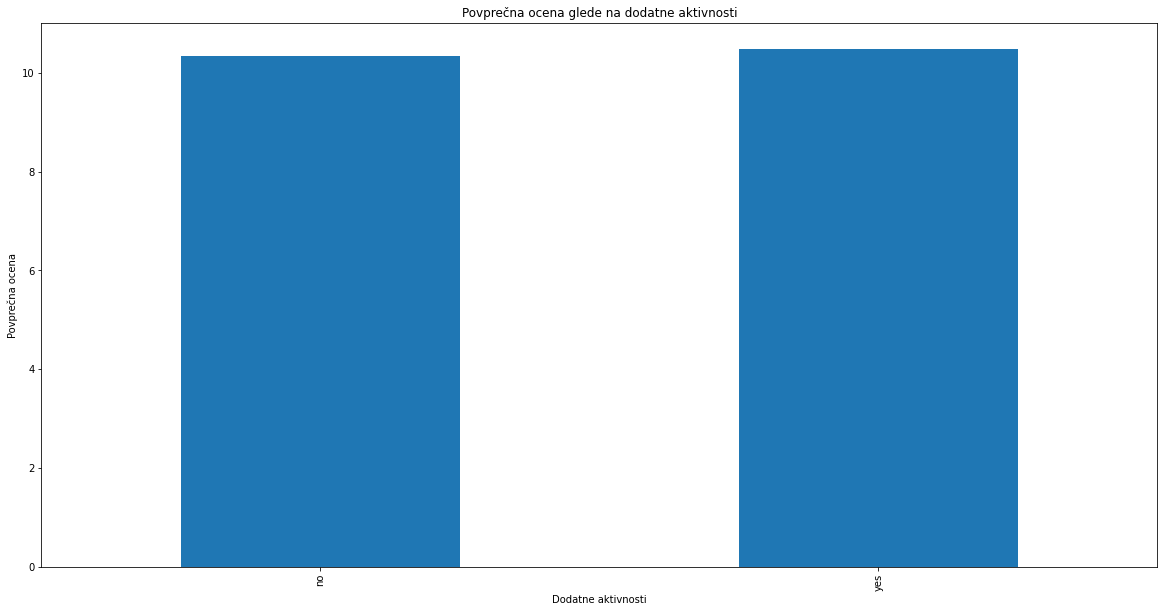

In [16]:
# Analyze the data for impact of extra-curricular activities on the average grade

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('activities')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Dodatne aktivnosti')
plt.title('Povprečna ocena glede na dodatne aktivnosti')


Stored 'famrel' (Series)


Text(0.5, 1.0, 'Povprečna ocena glede na družinske odnose')

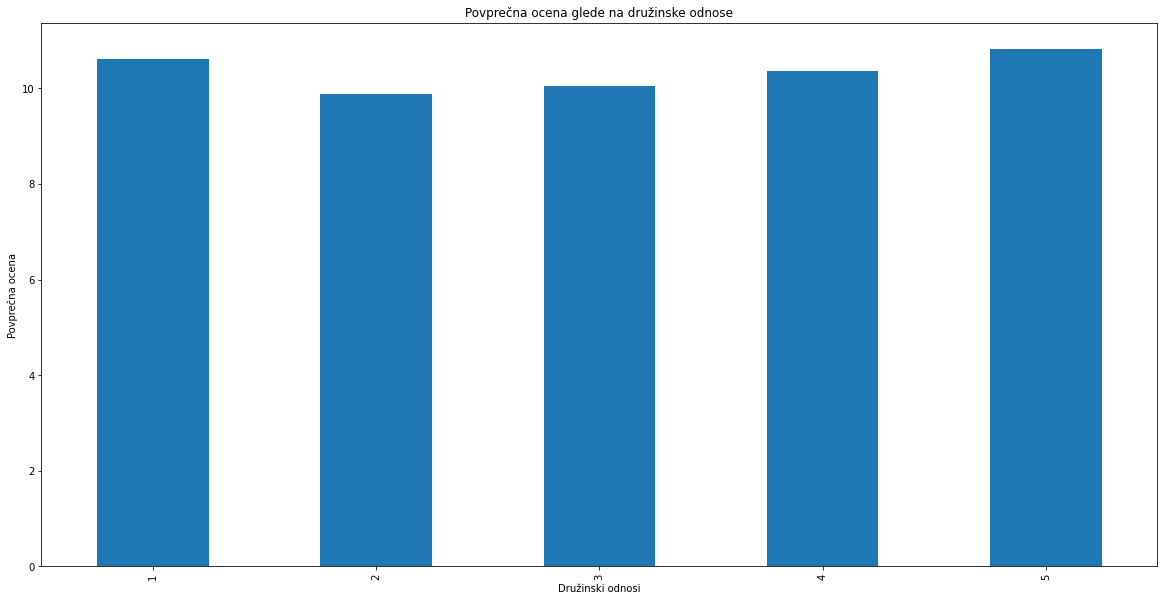

In [57]:
# Analyze family relationship and the average grade
famrel = data.groupby('famrel')['G3'].mean()
%store famrel

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('famrel')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Družinski odnosi')
plt.title('Povprečna ocena glede na družinske odnose')


Stored 'reason' (Series)


Text(0.5, 1.0, 'Povprečna ocena glede na razlog za izbiro šole')

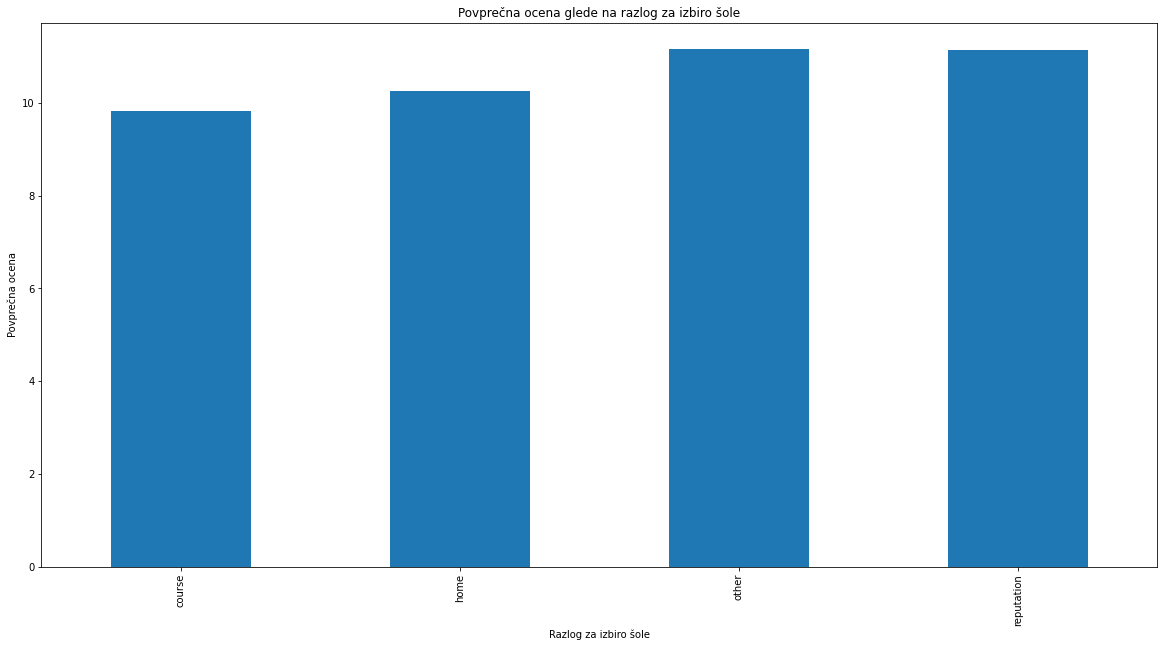

In [58]:
# Analyze the impact of reason for choosing school on the average grade

reason = data.groupby('reason')['G3'].mean()
%store reason

plt.figure(figsize=(20,10))
plt.ascending = True
data.groupby('reason')['G3'].mean().plot(kind='bar')
plt.ylabel('Povprečna ocena')
plt.xlabel('Razlog za izbiro šole')
plt.title('Povprečna ocena glede na razlog za izbiro šole')


Mean Squared Error: 4.22903040878447
Stored 'mse' (float64)
R Squared: 0.8076144932705505
Stored 'r_squared' (float64)
[0.87199394 0.85349962 0.83617226 0.83319695 0.79570242]
Stored 'scores' (ndarray)
Stored 'y_pred' (ndarray)
Stored 'y_test' (Series)
G2               0.976437
famrel           0.238806
G1               0.167341
reason_home      0.137230
age              0.135308
failures         0.097388
activities_no    0.075344
Fjob_other       0.045065
goout            0.043732
absences         0.037035
dtype: float64
Stored 'top_predictors' (Series)


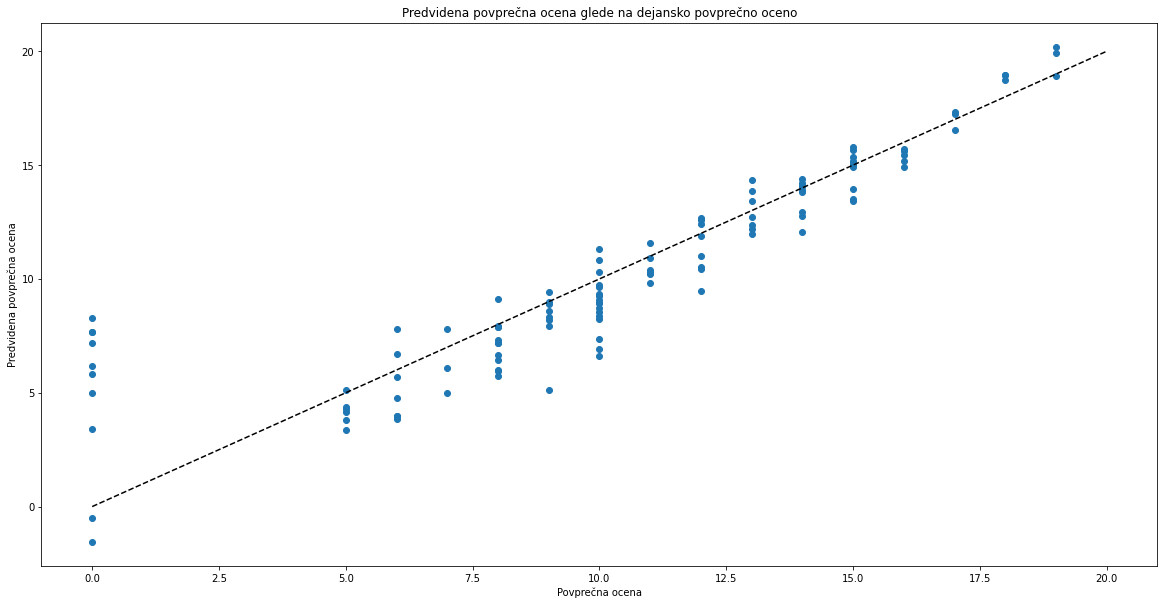

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

#data = data.drop(['G2', 'G1'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('G3', axis=1), data['G3'], test_size=0.3, random_state=42)

# Combine training and testing data for preprocessing
combined_data = pd.concat([X_train, X_test])

# Convert categorical data into dummy variables
combined_data = pd.get_dummies(combined_data)

# Split back into training and testing data
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

# Fill missing values with the mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict the average grade
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

%store mse

# Calculate the square coefficient of the prediction
r_squared = lasso.score(X_test, y_test)
print("R Squared:", r_squared)

%store r_squared

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso, X_train, y_train, cv=5)
print(scores)

%store scores


# Show visual representation of the predicted average grade and the actual average grade, with a line in the middle showing the ideal prediction

%store y_pred
%store y_test

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0, 20], '--k')
plt.axis('tight')
plt.xlabel('Povprečna ocena')
plt.ylabel('Predvidena povprečna ocena')
plt.title('Predvidena povprečna ocena glede na dejansko povprečno oceno')

# Get the coefficients and corresponding predictor names
coefficients = pd.Series(lasso.coef_, index=X_train.columns)

# Sort the coefficients in descending order of absolute values
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Print the top 10 predictors with the highest absolute coefficients
top_predictors = sorted_coefficients.head(10)
print(top_predictors)

%store top_predictors




Mean Squared Error: 18.304584429330678
Stored 'mse2' (float64)
R Squared: 0.16729453077615675
Stored 'r_squared2' (float64)
[ 0.16957412 -0.00716116  0.08222934  0.16458812  0.05769982]
Stored 'scores2' (ndarray)
Stored 'y_pred2' (ndarray)
Stored 'y_test2' (Series)
failures       1.779936
Mjob_health    0.630614
romantic_no    0.625521
famsup_no      0.622811
paid_no        0.564949
goout          0.396073
Medu           0.390354
sex_F          0.356134
studytime      0.225050
higher_no      0.211783
dtype: float64
Stored 'top_predictors2' (Series)


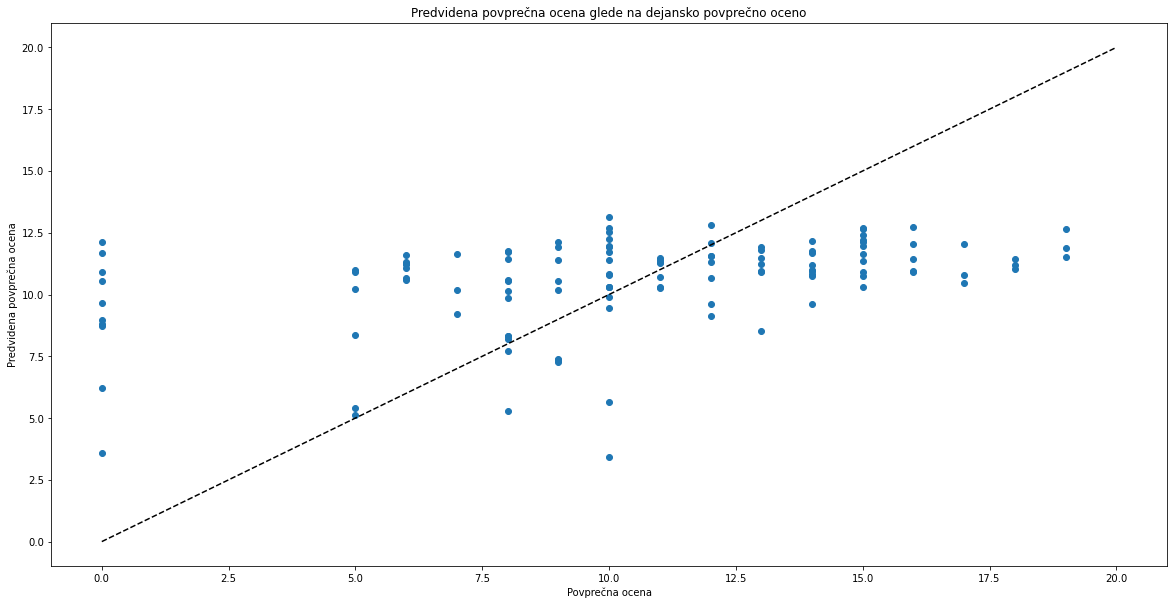

In [64]:
new_data = data

new_data = new_data.drop(['G2', 'G1'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('G3', axis=1), new_data['G3'], test_size=0.3, random_state=42)

# Combine training and testing data for preprocessing
combined_data = pd.concat([X_train, X_test])

# Convert categorical data into dummy variables
combined_data = pd.get_dummies(combined_data)

# Split back into training and testing data
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

# Fill missing values with the mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Train the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict the average grade
y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mse2 = mse
%store mse2

# Calculate the square coefficient of the prediction
r_squared = lasso.score(X_test, y_test)
print("R Squared:", r_squared)

r_squared2 = r_squared
%store r_squared2

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lasso, X_train, y_train, cv=5)
print(scores)

scores2 = scores
%store scores2


# Show visual representation of the predicted average grade and the actual average grade, with a line in the middle showing the ideal prediction

y_pred2 = y_pred
y_test2 = y_test

%store y_pred2
%store y_test2

plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0, 20], '--k')
plt.axis('tight')
plt.xlabel('Povprečna ocena')
plt.ylabel('Predvidena povprečna ocena')
plt.title('Predvidena povprečna ocena glede na dejansko povprečno oceno')

# Get the coefficients and corresponding predictor names
coefficients = pd.Series(lasso.coef_, index=X_train.columns)

# Sort the coefficients in descending order of absolute values
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

# Print the top 10 predictors with the highest absolute coefficients
top_predictors = sorted_coefficients.head(10)
print(top_predictors)

top_predictors2 = top_predictors
%store top_predictors2